In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [6]:
df = pd.read_csv("./collections/1979_sm_locations.csv")
df

,Year,Day,H,M,S,Lat,Long,Magnitude,Comments
0,1971,107,7,0,55,48.0,35.0,2.8,NaN
1,1971,140,17,25,10,42.0,-24.0,2.0,NaN
2,1971,192,13,24,45,43.0,-47.0,1.9,Or lat -42 long -60
3,1972,2,22,29,40,54.0,101.0,1.9,NaN
4,1972,261,14,35,55,12.0,46.0,1.0,NaN
5,1972,341,23,8,20,51.0,45.0,1.4,NaN
6,1972,344,3,50,15,-20.0,-80.0,1.2,NaN
7,1973,39,22,52,10,33.0,35.0,0.8,NaN
8,1973,72,7,56,30,-84.0,-134.0,3.2,NaN
9,1973,171,20,22,0,-1.0,-71.0,2.2,NaN


In [36]:


from cmath import isnan


for i,x in enumerate(df["Lat"]):
  if isnan(x) or isnan(df["Long"][i]): 
    df = df.drop(i)
        
df

,Year,Day,H,M,S,Lat,Long,Magnitude,Comments
0,1971,107,7,0,55,48.0,35.0,2.8,NaN
1,1971,140,17,25,10,42.0,-24.0,2.0,NaN
2,1971,192,13,24,45,43.0,-47.0,1.9,Or lat -42 long -60
3,1972,2,22,29,40,54.0,101.0,1.9,NaN
4,1972,261,14,35,55,12.0,46.0,1.0,NaN
5,1972,341,23,8,20,51.0,45.0,1.4,NaN
6,1972,344,3,50,15,-20.0,-80.0,1.2,NaN
7,1973,39,22,52,10,33.0,35.0,0.8,NaN
8,1973,72,7,56,30,-84.0,-134.0,3.2,NaN
9,1973,171,20,22,0,-1.0,-71.0,2.2,NaN


In [76]:
df_norm = list(preprocessing.minmax_scale(df[['Lat', 'Long']]))
df_norm

[array([0.81987578, 0.71914894]),
 array([0.7826087 , 0.46808511]),
 array([0.78881988, 0.37021277]),
 array([0.85714286, 1.        ]),
 array([0.59627329, 0.76595745]),
 array([0.83850932, 0.76170213]),
 array([0.39751553, 0.22978723]),
 array([0.72670807, 0.71914894]),
 array([0., 0.]),
 array([0.51552795, 0.26808511]),
 array([0.29192547, 0.44680851]),
 array([0.74534161, 0.50212766]),
 array([0.22360248, 0.11914894]),
 array([0.29192547, 0.74893617]),
 array([0.65217391, 0.94468085]),
 array([0.70186335, 0.15319149]),
 array([0.98757764, 0.74042553]),
 array([0.50931677, 0.35319149]),
 array([0.40372671, 0.45957447]),
 array([0.2173913, 0.3787234]),
 array([0.54037267, 0.32340426]),
 array([0.47204969, 0.84255319]),
 array([0.83229814, 0.69787234]),
 array([0.75776398, 0.75744681]),
 array([0.83229814, 0.48510638]),
 array([0.40372671, 0.51914894]),
 array([1.        , 0.52765957])]

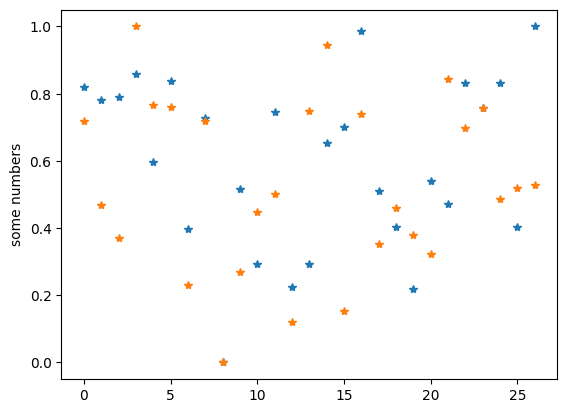

In [52]:

plt.plot(df_norm,'*')
plt.ylabel('some numbers')
plt.show()

In [73]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
df['cluster_label'] = kmeans.fit_predict(df[df.columns[5:7]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(df[df.columns[5:7]]) #
df

,Year,Day,H,M,S,Lat,Long,Magnitude,Comments,cluster_label
0,1971,107,7,0,55,48.0,35.0,2.8,NaN,1
1,1971,140,17,25,10,42.0,-24.0,2.0,NaN,2
2,1971,192,13,24,45,43.0,-47.0,1.9,Or lat -42 long -60,2
3,1972,2,22,29,40,54.0,101.0,1.9,NaN,1
4,1972,261,14,35,55,12.0,46.0,1.0,NaN,1
5,1972,341,23,8,20,51.0,45.0,1.4,NaN,1
6,1972,344,3,50,15,-20.0,-80.0,1.2,NaN,0
7,1973,39,22,52,10,33.0,35.0,0.8,NaN,1
8,1973,72,7,56,30,-84.0,-134.0,3.2,NaN,0
9,1973,171,20,22,0,-1.0,-71.0,2.2,NaN,0


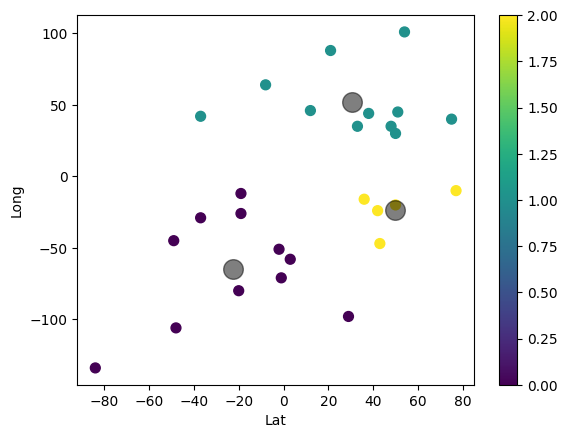

In [75]:
df.plot.scatter(x = 'Lat', y = 'Long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [77]:
pd.DataFrame.to_csv("centers.csv",centers)

array([[-22.45454545, -64.54545455],
       [ 30.63636364,  51.81818182],
       [ 49.6       , -23.4       ]])